# 🎓 Big Data Analytics Mini Project  
## 🏏 IPL – Most Runs Per Over (All Seasons Combined)

### 👨‍💻 Submitted By:  
**P. MAHESH**  <br>
**Roll No:** 2211CS010469  <br>
**Section:** S1  <br>
**Subject:** Big Data Analytics  <br>
**Mini Project Title:** IPL – Most Runs Per Over Analysis  

---

### 📖 Project Overview  
This mini project explores the **IPL Most Runs per Over (All Seasons Combined)** dataset using  
**Pandas, Matplotlib, and PySpark** to uncover insights about scoring patterns, boundary distributions,  
opponent weaknesses, and venue-based performance.  


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Most Runs Per Over All Seasons Combine.csv")
df.head()

,Unnamed: 0,Player,Runs,BF,SR,4s,6s,Against,Venue,Match Date
0,0,Virender Sehwag,30,6,500.00,3,3,DEC,Rajiv Gandhi Intl. Cricket Stadium,22 April 2008
1,1,Sanath Jayasuriya,26,5,520.00,2,3,CSK,Wankhede Stadium,14 May 2008
2,2,MF Maharoof,26,5,520.00,0,4,RR,Sawai Mansingh Stadium,11 May 2008
3,3,Rohit Sharma,26,6,433.33,3,2,DC,Rajiv Gandhi Intl. Cricket Stadium,22 April 2008
4,4,Shane Watson,26,6,433.33,5,1,RCB,M. Chinnaswamy Stadium,26 April 2008


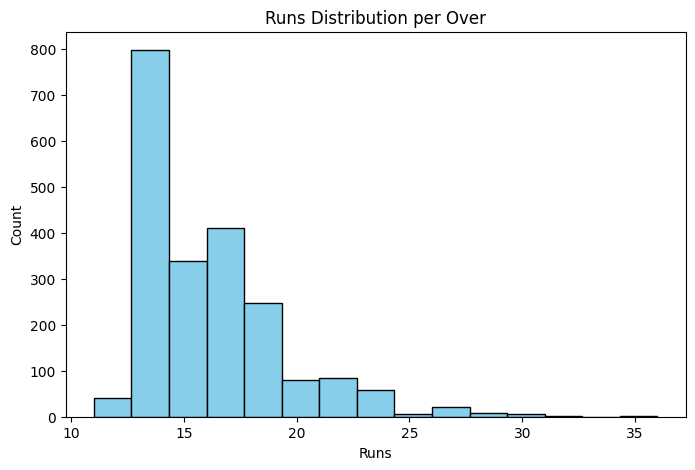

In [2]:
plt.figure(figsize=(8,5))
plt.hist(df['Runs'], bins=15, color="skyblue", edgecolor="black")
plt.title("Runs Distribution per Over")
plt.xlabel("Runs")
plt.ylabel("Count")
plt.show()


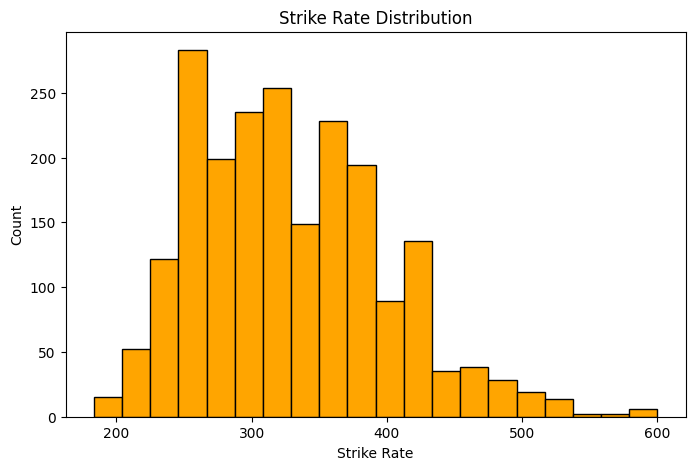

In [3]:
plt.figure(figsize=(8,5))
plt.hist(df['SR'], bins=20, color="orange", edgecolor="black")
plt.title("Strike Rate Distribution")
plt.xlabel("Strike Rate")
plt.ylabel("Count")
plt.show()


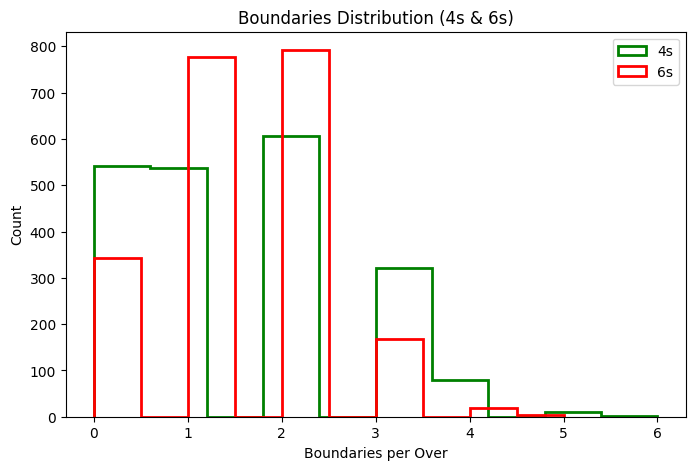

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['4s'], bins=10, color="green", histtype="step", linewidth=2, label="4s")
plt.hist(df['6s'], bins=10, color="red", histtype="step", linewidth=2, label="6s")
plt.title("Boundaries Distribution (4s & 6s)")
plt.xlabel("Boundaries per Over")
plt.ylabel("Count")
plt.legend()
plt.show()


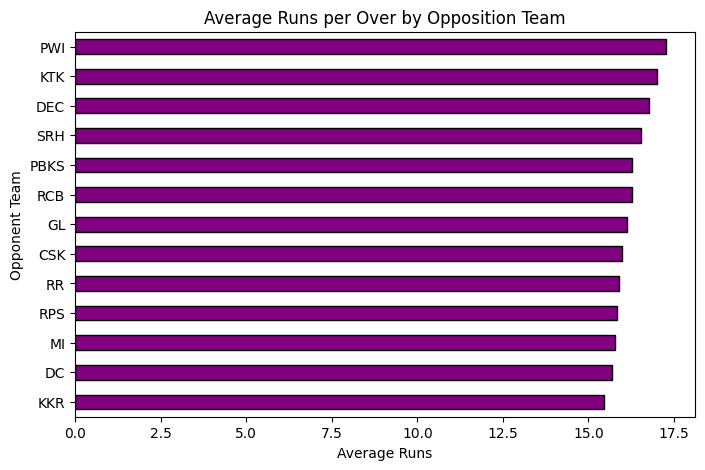

In [5]:
avg_runs_team = df.groupby("Against")["Runs"].mean().sort_values()
plt.figure(figsize=(8,5))
avg_runs_team.plot(kind="barh", color="purple", edgecolor="black")
plt.title("Average Runs per Over by Opposition Team")
plt.xlabel("Average Runs")
plt.ylabel("Opponent Team")
plt.show()


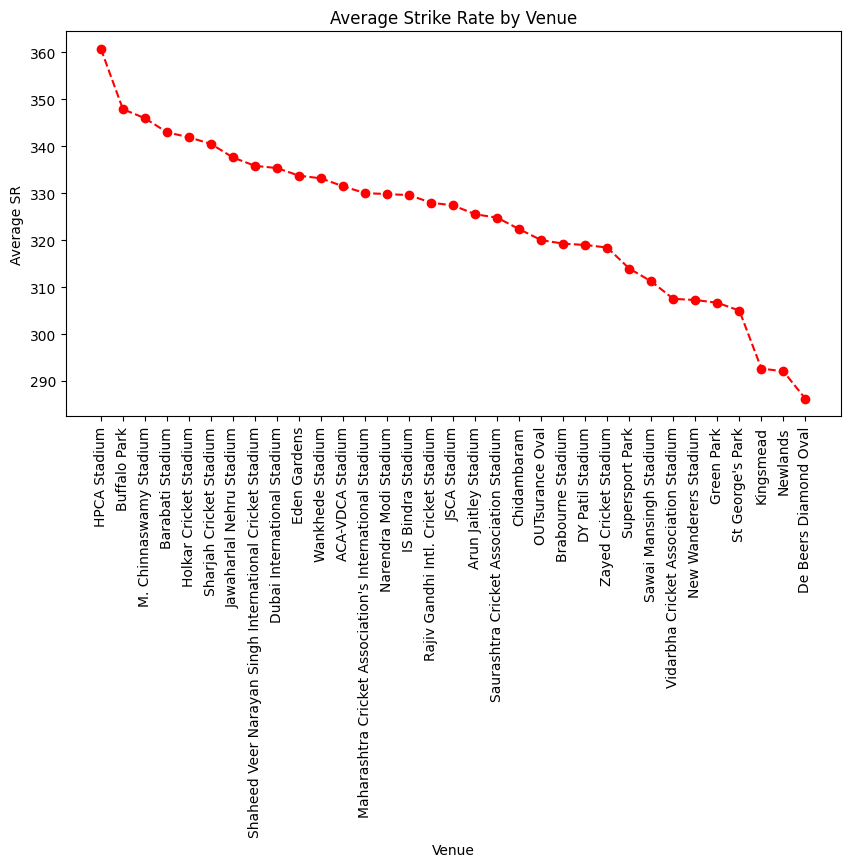

In [6]:
avg_sr_venue = df.groupby("Venue")["SR"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.plot(avg_sr_venue.index, avg_sr_venue.values, marker="o", linestyle="--", color="red")
plt.title("Average Strike Rate by Venue")
plt.xlabel("Venue")
plt.ylabel("Average SR")
plt.xticks(rotation=90)
plt.show()


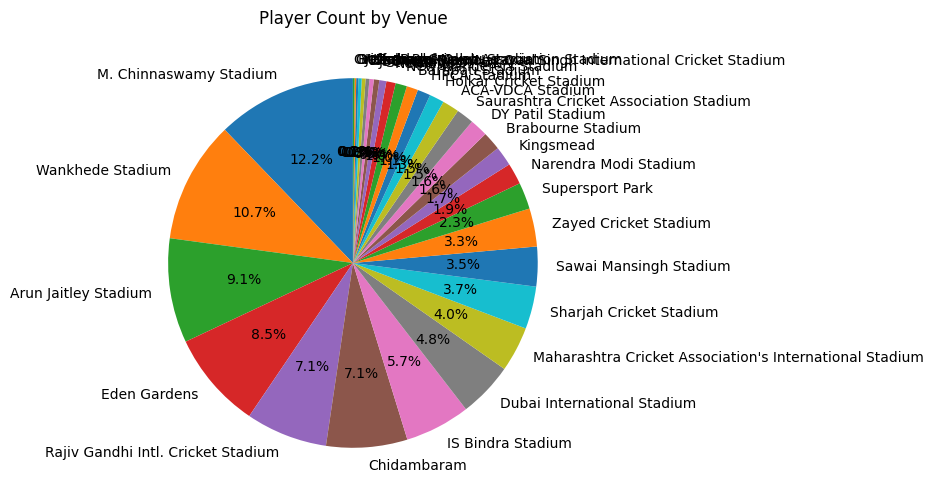

In [7]:
venue_count = df["Venue"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(venue_count, labels=venue_count.index, autopct="%1.1f%%", startangle=90)
plt.title("Player Count by Venue")
plt.show()


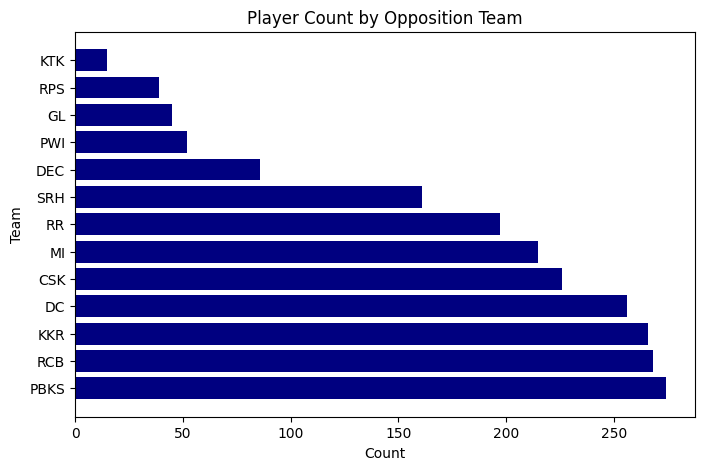

In [8]:
team_count = df["Against"].value_counts()
plt.figure(figsize=(8,5))
plt.barh(team_count.index, team_count.values, color="navy")
plt.title("Player Count by Opposition Team")
plt.xlabel("Count")
plt.ylabel("Team")
plt.show()


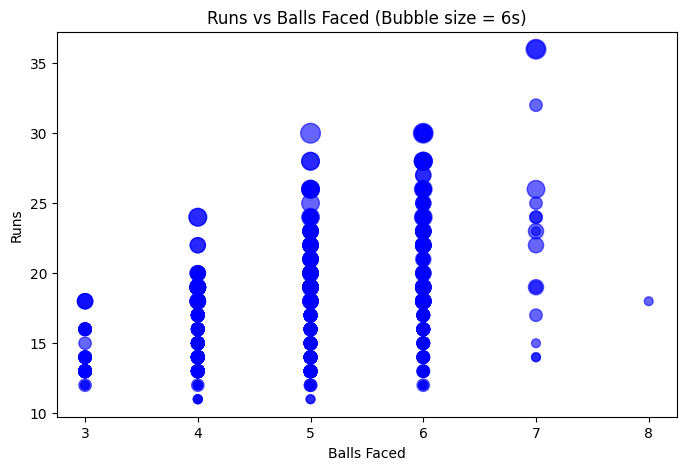

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(df['BF'], df['Runs'], s=df['6s']*40, alpha=0.6, c='blue')
plt.title("Runs vs Balls Faced (Bubble size = 6s)")
plt.xlabel("Balls Faced")
plt.ylabel("Runs")
plt.show()


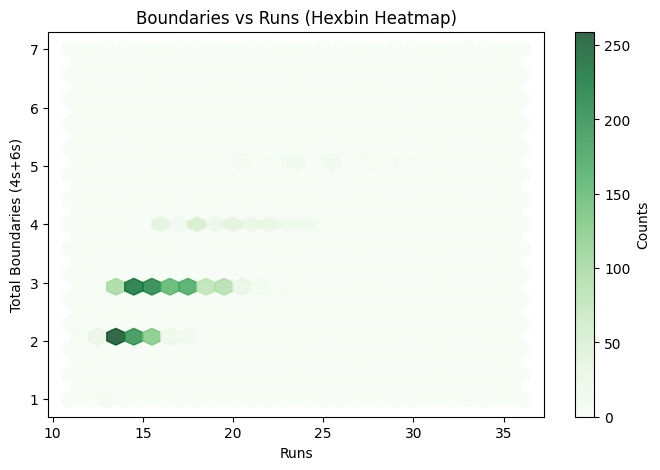

In [10]:
plt.figure(figsize=(8,5))
plt.hexbin(df['Runs'], df['4s'] + df['6s'], gridsize=25, cmap="Greens", alpha=0.8)
plt.colorbar(label="Counts")
plt.title("Boundaries vs Runs (Hexbin Heatmap)")
plt.xlabel("Runs")
plt.ylabel("Total Boundaries (4s+6s)")
plt.show()


<Figure size 1000x500 with 0 Axes>

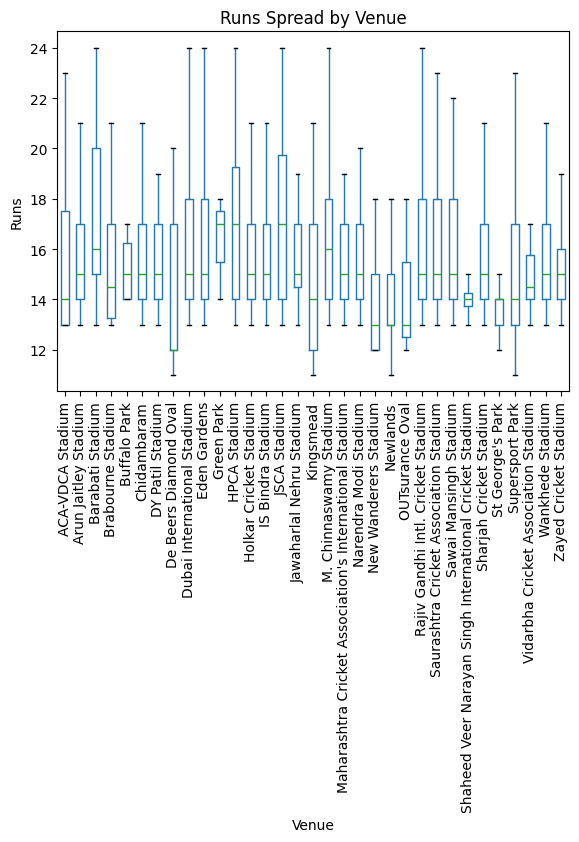

In [11]:
plt.figure(figsize=(10,5))
df.boxplot(column="Runs", by="Venue", grid=False, showfliers=False)
plt.title("Runs Spread by Venue")
plt.suptitle("")  # remove default title
plt.xlabel("Venue")
plt.ylabel("Runs")
plt.xticks(rotation=90)
plt.show()


In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max

# Start Spark session
spark = SparkSession.builder.appName("IPLDataAnalytics").getOrCreate()

# Load the CSV file
df = spark.read.option("header", True).option("inferSchema", True).csv("Most Runs Per Over All Seasons Combine.csv")

# Show schema
df.printSchema()

# Show first 5 rows
df.show(5)


root
 |-- _c0: integer (nullable = true)
 |-- Player: string (nullable = true)
 |-- Runs: integer (nullable = true)
 |-- BF: integer (nullable = true)
 |-- SR: double (nullable = true)
 |-- 4s: integer (nullable = true)
 |-- 6s: integer (nullable = true)
 |-- Against: string (nullable = true)
 |-- Venue: string (nullable = true)
 |-- Match Date: string (nullable = true)

+---+-----------------+----+---+------+---+---+-------+--------------------+-------------+
|_c0|           Player|Runs| BF|    SR| 4s| 6s|Against|               Venue|   Match Date|
+---+-----------------+----+---+------+---+---+-------+--------------------+-------------+
|  0|  Virender Sehwag|  30|  6| 500.0|  3|  3|    DEC|Rajiv Gandhi Intl...|22 April 2008|
|  1|Sanath Jayasuriya|  26|  5| 520.0|  2|  3|    CSK|    Wankhede Stadium|  14 May 2008|
|  2|      MF Maharoof|  26|  5| 520.0|  0|  4|     RR|Sawai Mansingh St...|  11 May 2008|
|  3|     Rohit Sharma|  26|  6|433.33|  3|  2|     DC|Rajiv Gandhi Intl...|22 A

In [13]:
print("Total number of records:", df.count())


Total number of records: 2100


In [14]:
print("Total number of unique players:", df.select("Player").distinct().count())


Total number of unique players: 243


In [15]:
print("Opposition Teams:")
df.select("Against").distinct().show()


Opposition Teams:
+-------+
|Against|
+-------+
|    KKR|
|     DC|
|     GL|
|     RR|
|     MI|
|    CSK|
|    SRH|
|    RCB|
|    DEC|
|    RPS|
|    KTK|
|    PWI|
|   PBKS|
+-------+



In [16]:
print("Records per Opposition Team:")
df.groupBy("Against").count().show()


Records per Opposition Team:
+-------+-----+
|Against|count|
+-------+-----+
|    KKR|  266|
|     DC|  256|
|     GL|   45|
|     RR|  197|
|     MI|  215|
|    CSK|  226|
|    SRH|  161|
|    RCB|  268|
|    DEC|   86|
|    RPS|   39|
|    KTK|   15|
|    PWI|   52|
|   PBKS|  274|
+-------+-----+



In [17]:
print("Records per Venue:")
df.groupBy("Venue").count().show()


Records per Venue:
+--------------------+-----+
|               Venue|count|
+--------------------+-----+
|Vidarbha Cricket ...|    6|
|    Barabati Stadium|   21|
|        Eden Gardens|  179|
|     OUTsurance Oval|    3|
|   Brabourne Stadium|   34|
|          Green Park|    3|
|Shaheed Veer Nara...|    8|
|        JSCA Stadium|   10|
|Holkar Cricket St...|   27|
|Dubai Internation...|  101|
|Sharjah Cricket S...|   78|
|    St George's Park|   13|
|     Supersport Park|   49|
|    Wankhede Stadium|  224|
|            Newlands|   17|
|Jawaharlal Nehru ...|    7|
|        HPCA Stadium|   24|
|Saurashtra Cricke...|   32|
|        Buffalo Park|    4|
|   IS Bindra Stadium|  120|
+--------------------+-----+
only showing top 20 rows


In [18]:
print("Minimum and Maximum Runs per Opposition Team:")
df.groupBy("Against").agg(
    min("Runs").alias("min_runs"),
    max("Runs").alias("max_runs")
).show()


Minimum and Maximum Runs per Opposition Team:
+-------+--------+--------+
|Against|min_runs|max_runs|
+-------+--------+--------+
|    KKR|      12|      28|
|     DC|      11|      26|
|     GL|      13|      30|
|     RR|      11|      26|
|     MI|      11|      28|
|    CSK|      11|      30|
|    SRH|      13|      28|
|    RCB|      11|      36|
|    DEC|      12|      30|
|    RPS|      13|      28|
|    KTK|      13|      36|
|    PWI|      13|      30|
|   PBKS|      11|      32|
+-------+--------+--------+



In [19]:
print("Top 10 highest scoring overs:")
df.select("Player", "Against", "Venue", "Runs", "BF", "SR") \
  .orderBy(col("Runs").desc()) \
  .show(10)


Top 10 highest scoring overs:
+---------------+-------+--------------------+----+---+------+
|         Player|Against|               Venue|Runs| BF|    SR|
+---------------+-------+--------------------+----+---+------+
|    Chris Gayle|    KTK|M. Chinnaswamy St...|  36|  7|514.28|
|Ravindra Jadeja|    RCB|    Wankhede Stadium|  36|  7|514.28|
|   Suresh Raina|   PBKS|    Wankhede Stadium|  32|  7|457.14|
|    Virat Kohli|     GL|M. Chinnaswamy St...|  30|  6| 500.0|
|    Shaun Marsh|    RCB|        HPCA Stadium|  30|  6| 500.0|
|    Chris Gayle|    PWI|M. Chinnaswamy St...|  30|  5| 600.0|
|Virender Sehwag|    DEC|Rajiv Gandhi Intl...|  30|  6| 500.0|
|  Rahul Tewatia|   PBKS|Sharjah Cricket S...|  30|  6| 500.0|
|    Pat Cummins|    CSK|    Wankhede Stadium|  30|  6| 500.0|
|    Jos Buttler|    KKR|        Eden Gardens|  28|  6|466.66|
+---------------+-------+--------------------+----+---+------+
only showing top 10 rows


In [20]:
print("Average Runs by Venue:")
df.groupBy("Venue").agg(avg("Runs").alias("avg_runs")).orderBy(col("avg_runs").desc()).show()


Average Runs by Venue:
+--------------------+------------------+
|               Venue|          avg_runs|
+--------------------+------------------+
|        HPCA Stadium|17.458333333333332|
|    Barabati Stadium|17.428571428571427|
|        JSCA Stadium|              17.1|
|M. Chinnaswamy St...|       16.83984375|
|Dubai Internation...|16.524752475247524|
|          Green Park|16.333333333333332|
|Rajiv Gandhi Intl...|16.326666666666668|
|    Wankhede Stadium|          16.28125|
|Saurashtra Cricke...|            16.125|
|        Eden Gardens|16.122905027932962|
|   IS Bindra Stadium|16.108333333333334|
|Narendra Modi Sta...| 16.05128205128205|
|Jawaharlal Nehru ...|              16.0|
|Maharashtra Crick...|15.975903614457831|
|Sharjah Cricket S...|15.961538461538462|
|    DY Patil Stadium|15.909090909090908|
|Sawai Mansingh St...|15.904109589041095|
|   Brabourne Stadium|15.794117647058824|
|    ACA-VDCA Stadium|15.741935483870968|
|Holkar Cricket St...| 15.74074074074074|
+----------

In [21]:
avg_sr = df.agg(avg("SR").alias("avg_sr")).collect()[0]["avg_sr"]
print("Average SR across dataset:", avg_sr)

print("Overs with SR greater than average:")
df.filter(col("SR") > avg_sr).select("Player", "Against", "Runs", "BF", "SR").show(10)


Average SR across dataset: 329.4293714285706
Overs with SR greater than average:
+-----------------+-------+----+---+------+
|           Player|Against|Runs| BF|    SR|
+-----------------+-------+----+---+------+
|  Virender Sehwag|    DEC|  30|  6| 500.0|
|Sanath Jayasuriya|    CSK|  26|  5| 520.0|
|      MF Maharoof|     RR|  26|  5| 520.0|
|     Rohit Sharma|     DC|  26|  6|433.33|
|     Shane Watson|    RCB|  26|  6|433.33|
|    Misbah-ul-Haq|     DC|  24|  6| 400.0|
|         MS Dhoni|    RCB|  23|  6|383.33|
|     Kamran Akmal|   PBKS|  23|  6|383.33|
|     Albie Morkel|     DC|  23|  6|383.33|
| Brendon McCullum|    RCB|  22|  6|366.66|
+-----------------+-------+----+---+------+
only showing top 10 rows


In [22]:
output_dir = "IPL_30plus_temp"
final_file = "IPL_30plus.csv"

overs_30plus = df.filter(col("Runs") >= 30)

# Write Spark output to temp folder
overs_30plus.coalesce(1) \
    .write.option("header", True) \
    .mode("overwrite") \
    .csv(output_dir)

print("✅ Saved overs with Runs >= 30 into CSV")


✅ Saved overs with Runs >= 30 into CSV


# ✅ Conclusion

From the analysis of the **IPL – Most Runs per Over (All Seasons Combined)** dataset, we can summarize:

- **Scoring Patterns**  
  - Most overs have runs in the **14–18 range**, but explosive overs (30+ runs) exist.  
  - The strike rate distribution shows a majority between **280 – 360**, but some overs exceed **500+ SR**.  

- **Boundary Insights**  
  - Sixes play a crucial role in overs with 24+ runs.  
  - Many overs with high runs also show a balanced contribution from fours and sixes.  

- **Opponent Analysis**  
  - Certain teams concede more runs on average, showing vulnerability in specific bowling units.  
  - Teams like RCB, PBKS, and RR feature more in high-scoring overs historically.  

- **Venue Insights**  
  - Batting-friendly venues (e.g., M. Chinnaswamy Stadium, Wankhede) show **higher average SR and runs**.  
  - Some stadiums have wider spreads in runs, indicating more unpredictable scoring conditions.  

- **Player Performance**  
  - Explosive hitters (Chris Gayle, AB de Villiers, Virender Sehwag, Kieron Pollard) dominate the highest scoring overs.  
  - Consistent strike rates across venues show adaptability of top players.  

- **PySpark Queries**  
  - Enabled quick insights into averages, max runs, and filtering overs above dataset averages.  
  - Demonstrated scalability for handling larger IPL datasets.  

---

## 📌 Final Note
This analysis highlights **how player performance, opponent strength, and venue conditions collectively influence explosive overs in IPL**.  
The dataset is well-suited for predictive modeling (e.g., predicting high-scoring overs), player performance benchmarking, and venue-based strategy planning.  
